In [1]:
from functions import *

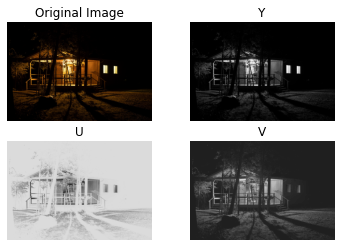

In [2]:
imRGB = loadImage("../database/LLI/1.jpg")
imYUV = RGB2YUV(imRGB)
Y, U, V = imYUV
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(imRGB)
axs[0, 0].axis('off')
axs[0, 0].title.set_text("Original Image")

axs[0, 1].imshow(Y, cmap = "gray")
axs[0, 1].axis('off')
axs[0, 1].title.set_text("Y")

axs[1, 0].imshow(U, cmap = "gray")
axs[1, 0].axis('off')
axs[1, 0].title.set_text("U")

axs[1, 1].imshow(V, cmap = "gray")
axs[1, 1].axis('off')
axs[1, 1].title.set_text("V")

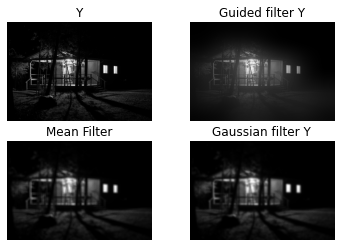

In [3]:
g = Y.copy()
for i in range(1):
    g = guidedFilter(Y, g, findWindowSize(Y), np.std(g))

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(Y, cmap = "gray")
axs[0, 0].axis('off')
axs[0, 0].title.set_text("Y")

axs[0, 1].imshow(g, cmap = "gray")
axs[0, 1].axis('off')
axs[0, 1].title.set_text("Guided filter Y")

axs[1, 0].imshow(meanFilter(Y), cmap = "gray")
axs[1, 0].axis('off')
axs[1, 0].title.set_text("Mean Filter")

axs[1, 1].imshow(gaussianFilter(Y), cmap = "gray")
axs[1, 1].axis('off')
axs[1, 1].title.set_text("Gaussian filter Y")

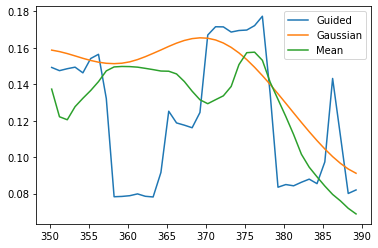

In [4]:
x = np.linspace(0, len(Y[0]), len(Y[0]))
line = 650
plt.plot(x[350:390], g[line][350:390], label = "Guided")
plt.plot(x[350:390], gaussianFilter(Y)[line][350:390], label = "Gaussian")
plt.plot(x[350:390], meanFilter(Y)[line][350:390], label = "Mean")
plt.legend();

Text(0.5, 1.0, 'Gamma transform Y')

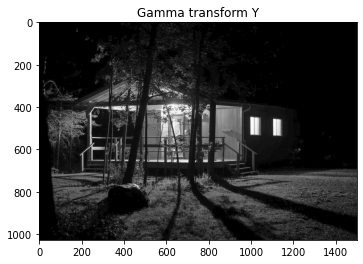

In [5]:
gY = localGammaTransform(Y, g)
plt.imshow(gY, cmap = "gray")
plt.title("Gamma transform Y")

In [6]:
gY_test1 = modularLocalGammaTransform(Y, 1.5, g)
gY_test2 = modularLocalGammaTransform(Y, 3 + g, g)
gY_test3 = modularLocalGammaTransform(Y, 3, g)

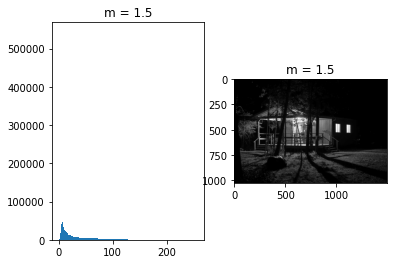

In [7]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(np.uint8(gY_test1*255).ravel(), 256, (0, 256))
axs[0].title.set_text("m = 1.5")

axs[1].imshow(np.uint8(gY_test1*255), cmap = "gray")
axs[1].title.set_text("m = 1.5")

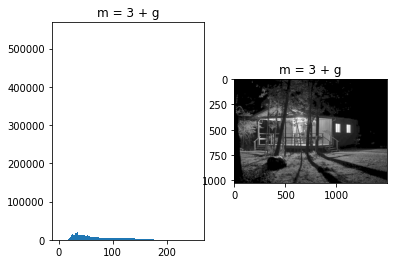

In [8]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(np.uint8(gY_test2*255).ravel(), 256, (0, 256))
axs[0].title.set_text("m = 3 + g")

axs[1].imshow(np.uint8(gY_test2*255), cmap = "gray")
axs[1].title.set_text("m = 3 + g")

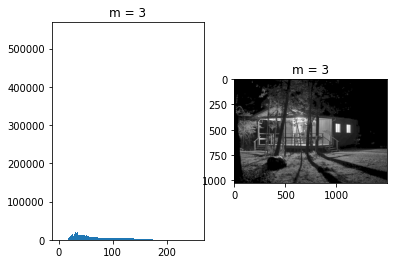

In [9]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(np.uint8(gY_test3*255).ravel(), 256, (0, 256))
axs[0].title.set_text("m = 3")

axs[1].imshow(np.uint8(gY_test3*255), cmap = "gray")
axs[1].title.set_text("m = 3")

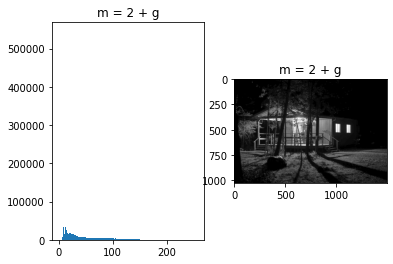

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(np.uint8(gY*255).ravel(), 256, (0, 256))
axs[0].title.set_text("m = 2 + g")

axs[1].imshow(np.uint8(gY*255), cmap = "gray")
axs[1].title.set_text("m = 2 + g")

Text(0.5, 1.0, 'Linearly stretched Y')

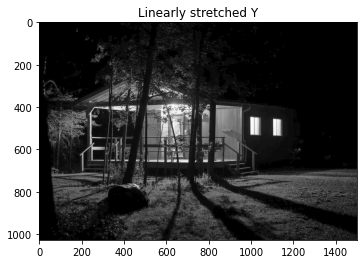

In [11]:
lY = linearStretching(gY)
plt.imshow(lY, cmap = "gray")
plt.title("Linearly stretched Y")

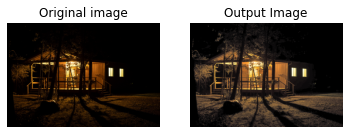

In [12]:
RGB = YUV2RGB(np.array([lY, U, V]))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(imRGB)
axs[0].axis('off')
axs[0].title.set_text("Original image")

axs[1].imshow(inRange(cv2.merge(RGB)))
axs[1].axis('off')
axs[1].title.set_text("Output Image")

/home/kunwar/dip/project/dip-project-bellissimo/src/functions.py:99: RuntimeWarning: invalid value encountered in true_divide
  return np.where(Y == 0.0, im, e * (((newY / Y) * (im + Y)) + im - Y))


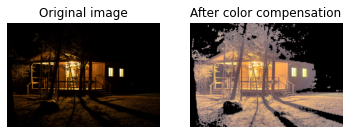

In [13]:
newRGB = colorCompensation(RGB, Y, lY, 0.5)
imNew = cv2.merge(newRGB)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(imRGB)
axs[0].axis('off')
axs[0].title.set_text("Original image")

axs[1].imshow(inRange(imNew))
axs[1].axis('off')
axs[1].title.set_text("After color compensation")

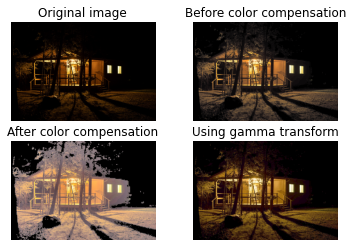

In [14]:
imGamma = gammaTransform(imRGB, 0.5)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(imRGB)
axs[0, 0].axis('off')
axs[0, 0].title.set_text("Original image")

axs[0, 1].imshow(inRange(cv2.merge(RGB)))
axs[0, 1].axis('off')
axs[0, 1].title.set_text("Before color compensation")

axs[1, 0].imshow(inRange(imNew))
axs[1, 0].axis('off')
axs[1, 0].title.set_text("After color compensation")

axs[1, 1].imshow(imGamma)
axs[1, 1].axis('off')
axs[1, 1].title.set_text("Using gamma transform")

In [15]:
imTest = gammaTransform(imRGB, 2)
imGamma = gammaTransform(imRGB, 0.7)
imWeak = weakLightEnhancement(imRGB)
imWeakCC = weakLightEnhancement(imRGB, False)

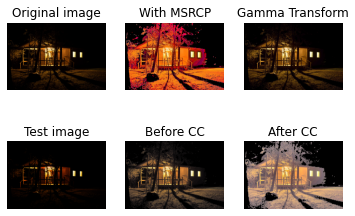

In [16]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(imRGB)
axs[0, 0].axis('off')
axs[0, 0].title.set_text("Original image")

axs[1, 0].imshow(imTest)
axs[1, 0].axis('off')
axs[1, 0].title.set_text("Test image")

axs[0, 2].imshow(imGamma)
axs[0, 2].axis('off')
axs[0, 2].title.set_text("Gamma Transform")

MSRCP = cv2.cvtColor(cv2.imread("../database/LLI/MSRCP.jpg"), cv2.COLOR_BGR2RGB)
axs[0, 1].imshow(MSRCP)
axs[0, 1].axis('off')
axs[0, 1].title.set_text("With MSRCP")

axs[1, 1].imshow(imWeak)
axs[1, 1].axis('off')
axs[1, 1].title.set_text("Before CC")

axs[1, 2].imshow(imWeakCC)
axs[1, 2].axis('off')
axs[1, 2].title.set_text("After CC")

In [17]:
print("MSE")
print("Gamma Transform:", mse(imGamma, imRGB), "\nMSRCP:", mse(MSRCP, imRGB), "\nWeak light image enhancement (without color compensation):", mse(imWeak, imRGB), "\nWeak light image enhancement (with color compensation):", mse(imWeakCC, imRGB))

MSE
Gamma Transform: 2218.375505960517 
MSRCP: 11063.563620498973 
Weak light image enhancement (without color compensation): 3050.4264781560355 
Weak light image enhancement (with color compensation): 13366.6610775033


In [18]:
print("PSNR")
print("Gamma Transform:", psnr(MSRCP, imRGB), "\nMSRCP:", psnr(MSRCP, imRGB), "\nWeak light image enhancement (without color compensation):", psnr(imWeak, imRGB), "\nWeak light image enhancement (with color compensation):", psnr(imWeakCC, imRGB))

PSNR
Gamma Transform: 7.69185323281011 
MSRCP: 7.69185323281011 
Weak light image enhancement (without color compensation): 13.287197988451663 
Weak light image enhancement (with color compensation): 6.870574245641473


In [19]:
print("SSIM")
print("Gamma Transform:", ssim(MSRCP, imRGB), "\nMSRCP:", ssim(MSRCP, imRGB), "\nWeak light image enhancement (without color compensation):", ssim(imWeak, imRGB), "\nWeak light image enhancement (with color compensation):", ssim(imWeakCC, imRGB))

SSIM
Gamma Transform: 0.3213574136345018 
MSRCP: 0.3213574136345018 
Weak light image enhancement (without color compensation): 0.32890783988980016 
Weak light image enhancement (with color compensation): 0.2908539355954309
